Importar librerias

In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
# Importamos la librería de pandas
import pandas as pd
import re
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Cargar Datos

In [4]:
# Si nuestro archivo csv que estamos leyendo esta separado por comas
df_train = pd.read_csv("Entrenamiento.csv", encoding='utf-8', index_col = False, usecols = [3,4,5,6,8,9,11])

# Corrige el error de lectura del archivo, pasa de string/objetc a float
df_train = df_train.replace('[^\d.]','', regex=True).astype(float) 

df_train.head()
#df_train.info()


,RSSI,Ang_azimuth,Ang_elevacion,Canal,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido
0,-60.0,-9.0,-12.0,37.0,134.0,30.0,0.0
1,-60.0,-8.0,-6.0,37.0,134.0,30.0,0.0
2,-56.0,-9.0,-12.0,38.0,134.0,30.0,0.0
3,-63.0,-9.0,-12.0,37.0,134.0,30.0,0.0
4,-59.0,-8.0,-6.0,37.0,134.0,30.0,0.0


In [ ]:
df_train.info()

In [5]:
df_test = pd.read_csv("Prueba.csv", encoding ='utf-8',index_col = False, usecols = [3,4,5,6,8,9,11])
df_test = df_test.replace('[^\d.]','', regex=True).astype(float) 
df_test.head()

,RSSI,Ang_azimuth,Ang_elevacion,Canal,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido
0,-54.0,-3.0,-26.0,38.0,134.0,90.0,0.0
1,-61.0,-3.0,-26.0,37.0,134.0,90.0,0.0
2,-54.0,-3.0,-26.0,38.0,134.0,90.0,0.0
3,-65.0,-3.0,-26.0,37.0,134.0,90.0,0.0
4,-54.0,-3.0,-26.0,38.0,134.0,90.0,0.0


In [ ]:
# Eliminando variables sin datos
#df_train[df_train.Canal.isna()==True]

In [ ]:
#df_test[df_test.Canal.isna()==True]

In [ ]:
# observemos el tipo de los datos
#df_train.dtypes

In [ ]:
#df_test.dtypes

Preparación de los datos

In [6]:
# Escalamos los datos
scaler = MinMaxScaler()
scaler = scaler.fit(df_train)

df_train[['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']] = scaler.transform (df_train[['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']])
df_test[['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']] = scaler.transform (df_test[['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']])


In [ ]:
df_test.head()

In [7]:

df_train_x = df_train.drop(['Error_dato_medido'],axis=1)
df_train_y = df_train.drop(['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)'],axis=1)

df_test_x = df_test.drop(['Error_dato_medido'],axis=1)
df_test_y = df_test.drop(['RSSI','Ang_azimuth','Ang_elevacion','Canal','Altura_ant(cm)','Distancia_entre_ant_tag(cm)'],axis=1)



In [8]:
# Creamos el dataset
def create_dataset (X, y, times_steps = 1):
    Xs, ys = [],[]
    for i in range(len(X)- times_steps):
        v = X.iloc[i:(i+ times_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+ times_steps])
    return np.array(Xs), np.array(ys)

In [9]:
time_steps = 40

X_train , y_train = create_dataset(df_train_x, df_train_y,time_steps)
X_test , y_test = create_dataset(df_test_x, df_test_y,time_steps)

print(X_train.shape,y_train.shape)

(20213, 40, 6) (20213, 1)


In [ ]:
print(X_test.shape,y_test.shape)

Creación y entrenamiento del modelo

In [ ]:
# # Red neuronal, regresión lineal sencilla

# oculta1 = tf.keras.layers.Dense(units = 64, input_shape = (X_train.shape[1], X_train.shape[2]))
# oculta2 = tf.keras.layers.Dense(units = 64)
# salida = tf.keras.layers.Dense(units = 1)
# modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# modelo.compile(
#     loss = "mean_squared_error", #tf.losses.MeanSquaredError(),
#     optimizer = tf.keras.optimizers.Adam(0.001)
# )

In [ ]:
# # Si no mejora lo vamos a desconectar
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)

In [ ]:
# history = modelo.fit(
#     X_train,
#     y_train,
#     epochs = 10,   #10 iteraciones
#     batch_size = 64,
#     validation_split = 0.2, # esto es para que use el 20% de los datos para validación
#     verbose = 1, #para que nos muestre los datos
#     #shuffle = False, #En sistemas temporales esto si es importante decirle que no mezcle los datos
#     callbacks = [callback]

# )

In [10]:
from matplotlib import pyplot as plt

In [ ]:
# plt.plot(history.history['loss'], label = 'Training loss')
# plt.plot(history.history['val_loss'], label = 'Validation loss')
# plt.legend()

In [ ]:
# # Queremos hacer una predicción

# y_pred = modelo.predict(X_test)


In [ ]:
# plt.plot(y_test, label = 'Real')
# plt.plot(y_pred[:,1], label = 'Predicted')
# plt.legend()

In [ ]:
# # Red neuronal, regresión lineal sencilla

# oculta1 = tf.keras.layers.Dense(units = 128, input_shape = (X_train.shape[1], X_train.shape[2]))
# oculta2 = tf.keras.layers.Dense(units = 64, activation = 'relu')
# oculta3 = tf.keras.layers.Dense(units = 128, activation = 'relu')
# salida = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
# modelo_2 = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

# modelo_2.compile(
#     loss = "mean_squared_error",
#     optimizer = tf.keras.optimizers.Adam(0.001)
# )

In [11]:
# # Si no mejora lo vamos a desconectar
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 20)

In [ ]:
# history = modelo_2.fit(
#     X_train,
#     y_train,
#     epochs = 10,   #10 iteraciones
#     batch_size = 64,
#     validation_split = 0.2, # esto es para que use el 20% de los datos para validación
#     verbose = 1, #para que nos muestre los datos
#     #shuffle = False, #En sistemas temporales esto si es importante decirle que no mezcle los datos
#     callbacks = [callback]

# )

In [ ]:
# plt.plot(history.history['loss'], label = 'Training loss')
# plt.plot(history.history['val_loss'], label = 'Validation loss')
# plt.legend()

In [ ]:
# y_pred = modelo_2.predict(X_test)

In [ ]:
# plt.plot(y_test, label = 'Real')
# plt.plot(y_pred[:,1], label = 'Predicted')
# plt.legend()

Nueva red

In [ ]:
X_train.shape[2]

In [12]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Convolution2D as Conv2D


Using TensorFlow backend.


In [13]:
# Red neuronal, regresión lineal sencilla

modelo_3 = Sequential()
modelo_3.add(Conv2D(3,(5,5), activation = 'relu', input_shape =(X_train.shape[1],X_train.shape[2],1)))
modelo_3.add(MaxPooling2D(pool_size = (3,2)))

modelo_3.add(Flatten())
modelo_3.add(Dense(32, activation = 'relu'))
modelo_3.add(Dropout(0.5))
modelo_3.add(Dense(1,activation = 'sigmoid'))

#Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (20034, 720, 6)

#oculta1 = tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2]))
#oculta2 = tf.keras.layers.Dense(units = 64, activation = 'relu')
#oculta3 = tf.keras.layers.Dense(units = 128, activation = 'relu')
#salida = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
#modelo_3 = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

	
modelo_3.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

#modelo_3.compile(
#    loss = "mean_squared_error",
#    optimizer = tf.keras.optimizers.Adam(0.001)
#)

In [ ]:
modelo_3.summary()

In [14]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [15]:
history = modelo_3.fit(
    X_train,
    y_train,
    epochs = 150,   #10 iteraciones
    batch_size = 64,
    validation_split = 0.1, # esto es para que use el 20% de los datos para validación
    verbose = 1#, #para que nos muestre los datos
    #shuffle = False, #En sistemas temporales esto si es importante decirle que no mezcle los datos
    #callbacks = [callback]
)

Train on 18191 samples, validate on 2022 samples
Epoch 1/150
18191/18191 [==============================] - 9s 511us/step - loss: 0.2496 - accuracy: 0.5325 - val_loss: 0.2478 - val_accuracy: 0.5816
Epoch 2/150
18191/18191 [==============================] - 4s 239us/step - loss: 0.2491 - accuracy: 0.5340 - val_loss: 0.2467 - val_accuracy: 0.5816
Epoch 3/150
18191/18191 [==============================] - 4s 220us/step - loss: 0.2489 - accuracy: 0.5340 - val_loss: 0.2463 - val_accuracy: 0.5816
Epoch 4/150
18191/18191 [==============================] - 4s 220us/step - loss: 0.2489 - accuracy: 0.5340 - val_loss: 0.2460 - val_accuracy: 0.5816
Epoch 5/150
18191/18191 [==============================] - 3s 171us/step - loss: 0.2488 - accuracy: 0.5340 - val_loss: 0.2459 - val_accuracy: 0.5816
Epoch 6/150
18191/18191 [==============================] - 3s 189us/step - loss: 0.2489 - accuracy: 0.5340 - val_loss: 0.2459 - val_accuracy: 0.5816
Epoch 7/150
18191/18191 [==============================] 

In [ ]:
import matplotlib as plt

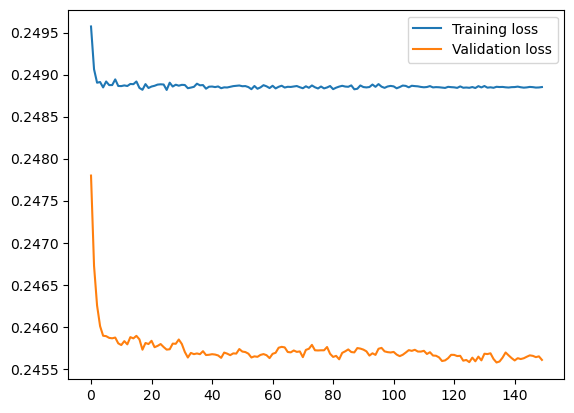

In [17]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

In [19]:
y_pred = modelo_3.predict(X_test)

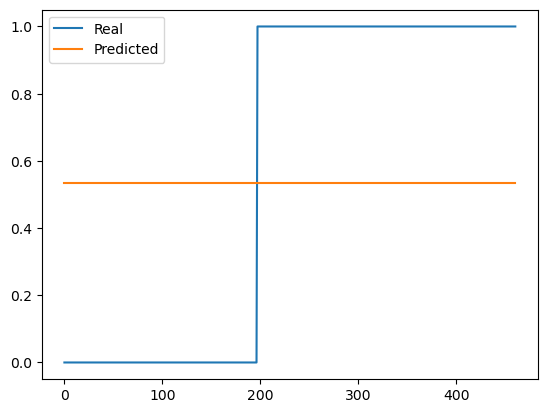

In [20]:
plt.plot(y_test, label = 'Real')
plt.plot(y_pred, label = 'Predicted')
plt.legend()

Graficar

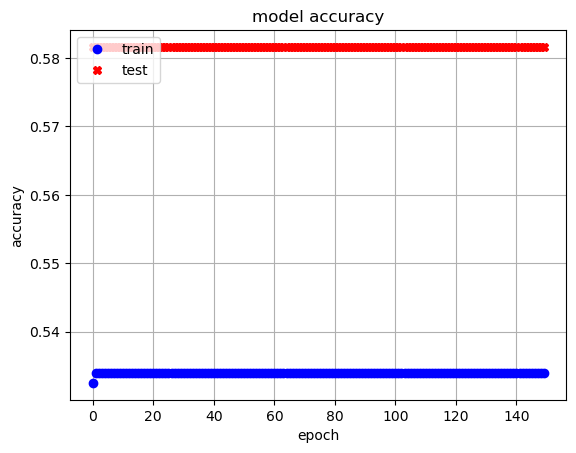

In [21]:
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()



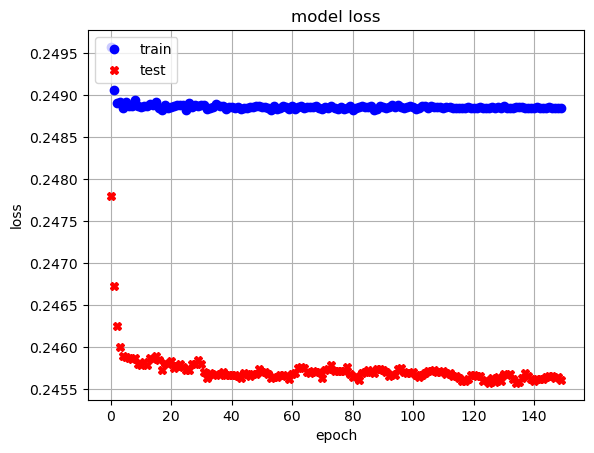

In [22]:
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

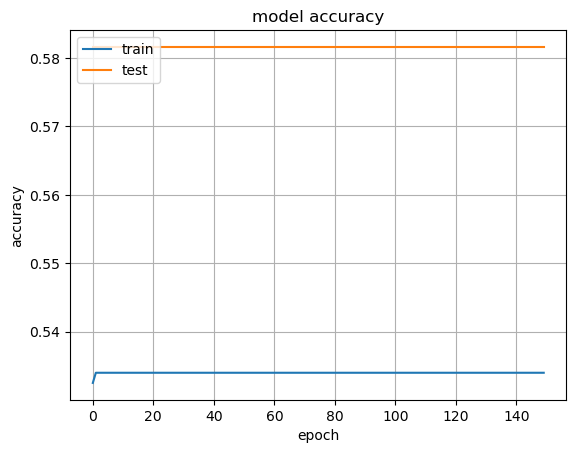

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

In [ ]:
# scaler2 = MinMaxScaler()
# scaler2.min_,scaler2.scale_ = scaler.min_[4],scaler.scale_[4]

# trainPredict = scaler2.inverse_transform(trainPredict)
# trainY = scaler2.inverse_transform([y_train])
# testPredict = scaler2.inverse_transform(testPredict)
# testY = scaler2.inverse_transform([y_test])

In [24]:
# Serializa el modelo para JSON
model_JSON = modelo_3.to_json()
name_json = "model.json"
with open(name_json, "w") as json_file:
    json_file.write(model_JSON)

# Serializar los pesos (weights) para HDF5
modelo_3.save_weights("model.h5")
print("Modelo guardado en el PC")

Modelo guardado en el PC


In [ ]:
# Modelo guardado en el PC
from keras.models import model_from_json

name_json = "model.json"

# carga el json y crea el modelo
json_file = open(name_json,'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
model = loaded_model.load_weights("model.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test

In [ ]:
modelo_3.save('LOS_20iteraciones_pc.h5')

In [ ]:
# Serializa el modelo para JSON
model_JSON = modelo_3.to_json()
name_json = "model.json"
with open(name_json, "w") as json_file:
    json_file.write(model_JSON)

# Serializar los pesos (weights) para HDF5
modelo_3.save_weights("model.h5")
print("Modelo guardado en el PC")



In [ ]:
from keras.models import model_from_json

In [ ]:

# carga el json y crea el modelo
json_file = (name_json,'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test